![Stryke Force Logo](https://avatars3.githubusercontent.com/u/20849460?v=3&s=200)
# 2020 INFINITE RECHARGE Computer Vision & Targeting
This notebook outlines the techniques used for the Stryke Force 2020 computer vision and targetting system. To facilitate understanding, we use Python and OpenCV to process step by step through the process, and show pictures with intermediate results. In the competition robot, we use C++ and OpenCV and we are only interested in the final targeting information.

Set up notebook dependencies.

In [117]:
%matplotlib inline
import cv2
from matplotlib import pyplot as plt
import numpy as np
import math
plt.rcParams['image.cmap'] = 'gray'

Define a utility function for displaying an image.

In [118]:
BGR = 0
HSV = 1
BW  = 2
def display_image(input_image, type):
    if type == BGR:
        plt.imshow(cv2.cvtColor(input_image, cv2.COLOR_BGR2RGB))
    elif type == HSV:
        plt.imshow(cv2.cvtColor(input_image, cv2.COLOR_HSV2RGB))
    elif type == BW:
        plt.imshow(input_image)
    else:
        raise("format not recognized.")
    plt.show()

### Capture a frame
Load our sample image and display it.

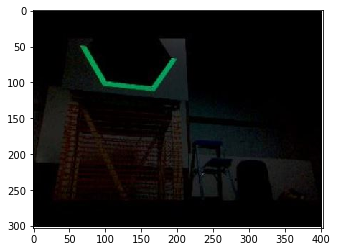

In [243]:
frame = cv2.imread("images/target98-5.JPG")
display_image(frame, BGR)

### Select pixels that fall in HSV range of our desired color

We now want to select all pixels that fall within the HSV range of our upper and lower limits selected prior to the match. We use OpenCV's **inRange** operation to process the frame and return a new black and white image with the selected pixels in white.

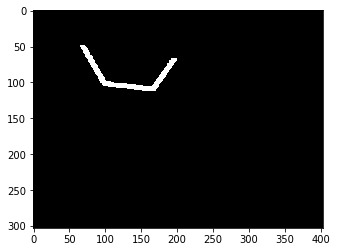

In [244]:
hsv_lower = (50, 0, 70)
hsv_upper = (90, 255, 255)

hsv_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
inrange_mask = cv2.inRange(hsv_frame, hsv_lower, hsv_upper)
display_image(inrange_mask, BW)

### Find the target outline
We now use this mask of the target to accurately locate the target in the frame. We use OpenCV's `findContours` operation to find a set of points that form an outline of our target. The `findContours` operation will find an outline for each white part of the mask but we know the target will have the largest outline.  To illustrate, we will show the original frame overlaid with the target outline.

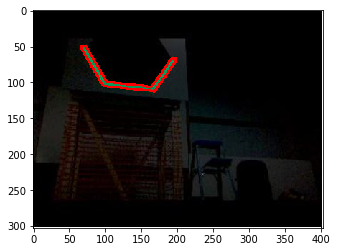

In [245]:
# contours will contain all contours
image, contours, hierarchy = cv2.findContours(inrange_mask.copy(), cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE)

# find the largest contour by area
target_contour = sorted(contours, key = cv2.contourArea, reverse = True)[0]

# overlay red contour on copy of original frame and display
frame_copy = frame.copy()
cv2.drawContours(frame_copy, [target_contour], -1, (0, 0, 255), 2)
display_image(frame_copy, BGR)

### Find the target using the target outline

We use `target_contour` to calculate targeting information.

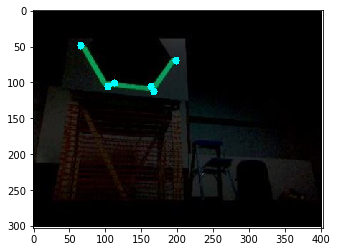

In [246]:
bounding_poly = cv2.approxPolyDP(target_contour, 10, 1)
poly_img = frame.copy()
cv2.polylines(poly_img, bounding_poly, 1, (255,255,0), 10)
display_image(poly_img, BGR)

#requires most extreme points to be found

51.84921646118164


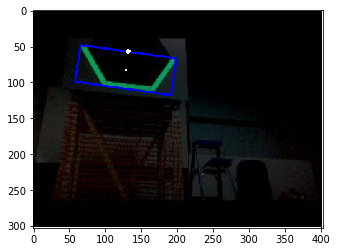

In [247]:
box_points = cv2.minAreaRect(target_contour)
box = cv2.boxPoints(box_points)
box = np.int0(box)

box_img = frame.copy();
cv2.drawContours(box_img, [box], 0, 255, 2)

center = (int(box_points[0][0]), int(box_points[0][1]))
w = box_points[1][1]
h = box_points[1][0]
angle = box_points[2]
if (w < h):
    temp = w
    w = h
    h = temp
else:
    angle = 90 + angle


top_center = (int(center[0] + h/2*math.sin(math.radians(angle))),
              int(center[1] - h/2*math.cos(math.radians(angle))))

print(h)


cv2.circle(box_img, center, 2, (255,255,255))

cv2.circle(box_img, top_center, 2, (255,255,255), 2)

display_image(box_img, BGR)

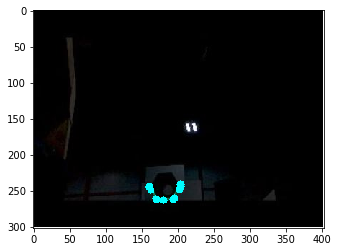

In [180]:
hull = cv2.convexHull(target_contour)

hull_img = frame.copy()

cv2.polylines(hull_img, hull, 1, (255,255,0), 10)
display_image(hull_img, BGR)